# Final Project Notebook

### NOTE: If you build a notebook in the cloud, just copy it down in place of this one!

![Specific_Project_1.png MISSING](../images/Specific_Project_1.png)

# Add code as needed in the cells below to produce your analytical products

In [ ]:
## Include whichever API are appropriate for your cloud provider



In [1]:
import time
import re
import sys
import os
import json
import feedparser
from bs4 import BeautifulSoup
from bs4.element import Comment
from google.cloud import storage
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types



def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

## use beutiful soup to parse Reddit
def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

## net neutrality thread RSS
a_reddit_rss_url = "http://www.reddit.com/r/politics/new/.rss?sort=new"
feed = feedparser.parse( a_reddit_rss_url )

#naming the file to be created
filename ='RedditPolits.txt'

if (feed['bozo'] == 1):
        print("Error Reading/Parsing Feed XML Data")    

## Else iterate through the file with tags
else: 
    f= open(filename,"w+");
    output = [] 
    for item in feed[ "items" ]:
        content = {"title":item["title"], "link":item["link"], "date":item["date"], "summary_text":item["summary"]}
        output.append(content)
    output1 = str(output)
    f.write(output1)
    f.close()
    
cwd=os.getcwd()   

In [2]:
PROJECT  = 'module-8-189305'
bucket_name = 'mod8_bucket'
source_file_name = cwd+'/'+filename
destination_blob_name = filename
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/dsa/home/souleymanesaleya/mym8.json'

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print('File {} uploaded to {}.'.format(
        source_file_name,
        destination_blob_name))
    
upload_blob(bucket_name, source_file_name, destination_blob_name)

File /dsa/home/souleymanesaleya/cloudComputingf17_souleymanesaleya/module8/exercises/RedditPolits.txt uploaded to RedditPolits.txt.


In [44]:
# def read_blob_as_string(bucket_name, source_blob_name):     
#     """Downloads a blob from the bucket and returns content in string"""     
#     storage_client = storage.Client(project=PROJECT)    
#     bucket = storage_client.get_bucket(bucket_name)     
#     blob = bucket.blob(source_blob_name)     
#     return blob.download_as_string().decode("utf-8")   
# myStringContent = read_blob_as_string(bucket_name,filename)
# print(myStringContent)

In [4]:
def entity_sentiment_file(gcs_uri):
    """Detects entity sentiment in a Google Cloud Storage file."""
    client = language.LanguageServiceClient()

    document = types.Document(
        gcs_content_uri=gcs_uri,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detect and send native Python encoding to receive correct word offsets.
    encoding = enums.EncodingType.UTF32
    if sys.maxunicode == 65535:
        encoding = enums.EncodingType.UTF16

    result = client.analyze_entity_sentiment(document, encoding)

    for entity in result.entities:
        print(u'Name: "{}"'.format(entity.name))
        for mention in entity.mentions:
            print(u'  Begin Offset : {}'.format(mention.text.begin_offset))
            print(u'  Content : {}'.format(mention.text.content))
            print(u'  Magnitude : {}'.format(mention.sentiment.magnitude))
            print(u'  Sentiment : {}'.format(mention.sentiment.score))
            print(u'  Type : {}'.format(mention.type))
        print(u'Salience: {}'.format(entity.salience))
        print(u'Sentiment: {}\n'.format(entity.sentiment))


In [5]:
gcs_uri = 'gs://mod8_bucket/RedditPolits.txt'
print(entity_sentiment_file(gcs_uri))


Name: "title"
  Begin Offset : 802
  Content : title
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
  Begin Offset : 1759
  Content : title
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
  Begin Offset : 2722
  Content : title
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
  Begin Offset : 4691
  Content : title
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
  Begin Offset : 5750
  Content : title
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
  Begin Offset : 6860
  Content : title
  Magnitude : 0.20000000298023224
  Sentiment : -0.20000000298023224
  Type : 2
  Begin Offset : 7917
  Content : title
  Magnitude : 0.20000000298023224
  Sentiment : -0.20000000298023224
  Type : 2
  Begin Offset : 9034
  Content : title
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
  Begin Offset : 10080
  Content : title
  Magnitude : 0.100

  Content : The Craziest Part
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
  Begin Offset : 2201
  Content : The Craziest Part
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
  Begin Offset : 2731
  Content : The Craziest Part
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
Salience: 0.0032478603534400463
Sentiment: magnitude: 0.30000001192092896
score: -0.10000000149011612


Name: "link"
  Begin Offset : 3741
  Content : link
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
  Begin Offset : 10158
  Content : link
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
Salience: 0.003194329096004367
Sentiment: magnitude: 0.20000000298023224
score: -0.10000000149011612


Name: "td"
  Begin Offset : 3285
  Content : td
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
Salience: 0.0027479538694024086
Sentime

  Begin Offset : 19983
  Content : title
  Magnitude : 0.20000000298023224
  Sentiment : -0.20000000298023224
  Type : 2
Salience: 0.0012262481031939387
Sentiment: magnitude: 0.20000000298023224
score: -0.20000000298023224


Name: "mentality"
  Begin Offset : 3727
  Content : mentality
  Magnitude : 0.20000000298023224
  Sentiment : -0.20000000298023224
  Type : 2
Salience: 0.001191533636301756
Sentiment: magnitude: 0.20000000298023224
score: -0.20000000298023224


Name: "mentality"
  Begin Offset : 3258
  Content : mentality
  Magnitude : 0.20000000298023224
  Sentiment : -0.20000000298023224
  Type : 2
Salience: 0.001191533636301756
Sentiment: magnitude: 0.20000000298023224
score: -0.20000000298023224


Name: "mentality"
  Begin Offset : 3204
  Content : mentality
  Magnitude : 0.20000000298023224
  Sentiment : -0.20000000298023224
  Type : 2
Salience: 0.001191533636301756
Sentiment: magnitude: 0.20000000298023224
score: -0.20000000298023224


Name: "alt"
  Begin Offset : 7337
  Cont


Name: "country"
  Begin Offset : 15890
  Content : country
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.0005732193239964545
Sentiment: 

Name: "No"
  Begin Offset : 4190
  Content : No
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 1
  Begin Offset : 4266
  Content : No
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
Salience: 0.0005719145992770791
Sentiment: magnitude: 0.10000000149011612


Name: "alt"
  Begin Offset : 22828
  Content : alt
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.0005472736665979028
Sentiment: 

Name: "link"
  Begin Offset : 22460
  Content : link
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.0005472736665979028
Sentiment: 

Name: "link"
  Begin Offset : 23367
  Content : link
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 2
Salience: 0.0005469651659950614
Sentiment: magnitude: 0.10000000149011612
score: -0.10000000149011612


Name: "br"
  Begin Offset : 23035
 

  Content : Congress
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
  Begin Offset : 16975
  Content : Congress
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 1
  Begin Offset : 17485
  Content : Congress
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
Salience: 0.0001326223136857152
Sentiment: magnitude: 0.30000001192092896
score: -0.10000000149011612


Name: "EU Commission: &quot"
  Begin Offset : 18919
  Content : EU Commission: &quot
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 1
  Begin Offset : 19015
  Content : EU Commission: &quot
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
Salience: 0.00011369439744157717
Sentiment: magnitude: 0.20000000298023224
score: -0.10000000149011612


Name: "HNP4PH"
  Begin Offset : 16020
  Content : HNP4PH
  Magnitude : 0.10000000149011612
  Sentiment : -0.10000000149011612
  Type : 1
Salience: 8.830408478388563e-05
Sentiment: magnitude: 0.10000000149011

In [6]:
host_ip = '35.224.107.10'
mypasswd = 'project'

In [48]:
import psycopg2
conn = psycopg2.connect(database = 'postgres', 
                              user = 'postgres', 
                              host = host_ip,
                              password = mypasswd)
with conn, conn.cursor() as cur:
                    cur.execute("CREATE TABLE sentiment_table (entity VARCHAR(255), sentscore NUMERIC, mag NUMERIC, salience NUMERIC, entityID SERIAL PRIMARY KEY)") 
# #     for entity in result.entities:
# with conn, conn.cursor() as cur:
#     cursor.execute('CREATE TABLE mentions (entity VARCHAR(255), salience NUMERIC, esentiment NUMERIC, sent NUMERIC, mag NUMERIC, entityID SERIAL PRIMARY KEY)')

In [50]:
def entity_sentiment_file(gcs_uri):
    """Detects entity sentiment in a Google Cloud Storage file."""
    client = language.LanguageServiceClient()

    document = types.Document(
        gcs_content_uri=gcs_uri,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detect and send native Python encoding to receive correct word offsets.
    encoding = enums.EncodingType.UTF32
    if sys.maxunicode == 65535:
        encoding = enums.EncodingType.UTF16

    result = client.analyze_entity_sentiment(document, encoding)
    
    for entity in result.entities:
        for mention in entity.mentions:
            name = entity.name
            content=mention.text.content
            salience = entity.salience
            mag = mention.sentiment.magnitude
            sentscore = mention.sentiment.score  

        row = (name,sentscore,mag,salience)
        print(row)
        with conn, conn.cursor() as cur:
            cur.execute("INSERT INTO sentiment_table (entity,sentscore,mag,salience) values (%s,%s,%s,%s)",row)


In [51]:
gcs_uri = 'gs://mod8_bucket/RedditPolits.txt'
entity_sentiment_file(gcs_uri)


('href', -0.10000000149011612, 0.10000000149011612, 0.2538818120956421)
('Animatronic Trump', -0.10000000149011612, 0.10000000149011612, 0.17390961945056915)
('Bush25', -0.10000000149011612, 0.10000000149011612, 0.03835451975464821)
('td', -0.10000000149011612, 0.10000000149011612, 0.011548674665391445)
('Disney World', 0.0, 0.0, 0.011295818723738194)
('td', -0.10000000149011612, 0.10000000149011612, 0.009873480536043644)
('table', -0.10000000149011612, 0.10000000149011612, 0.00923282839357853)
('title', -0.20000000298023224, 0.20000000298023224, 0.00923282839357853)
('table', -0.10000000149011612, 0.10000000149011612, 0.00923282839357853)
('table', -0.10000000149011612, 0.10000000149011612, 0.00923282839357853)
('title', -0.10000000149011612, 0.10000000149011612, 0.00923282839357853)
('robot', 0.0, 0.0, 0.00794164277613163)
('immigration system', 0.0, 0.0, 0.007817661389708519)
('alt', -0.10000000149011612, 0.10000000149011612, 0.007402177434414625)
('link', -0.10000000149011612, 0.10

('title', -0.10000000149011612, 0.10000000149011612, 0.001015692949295044)
('table', -0.10000000149011612, 0.10000000149011612, 0.001015692949295044)
('table', -0.10000000149011612, 0.10000000149011612, 0.001015692949295044)
('table', -0.10000000149011612, 0.10000000149011612, 0.001014572917483747)
('title', -0.20000000298023224, 0.20000000298023224, 0.001014572917483747)
('table', -0.10000000149011612, 0.10000000149011612, 0.001014572917483747)
('title', -0.10000000149011612, 0.10000000149011612, 0.001014572917483747)
('table', -0.10000000149011612, 0.10000000149011612, 0.001014572917483747)
('title', -0.20000000298023224, 0.20000000298023224, 0.001014572917483747)
('sexual harassment records', -0.20000000298023224, 0.20000000298023224, 0.0010041299974545836)
('td', -0.10000000149011612, 0.10000000149011612, 0.0009459616849198937)
('td', -0.10000000149011612, 0.10000000149011612, 0.0009459616849198937)
('td', -0.20000000298023224, 0.20000000298023224, 0.0009452347294427454)
('href', -

('shellacking', 0.0, 0.0, 0.00048224415513686836)
('tax plan', 0.0, 0.0, 0.00048224415513686836)
('Facebook', -0.10000000149011612, 0.10000000149011612, 0.00048219895688816905)
('rebuke', -0.5, 0.5, 0.00048070927732624114)
('request', -0.4000000059604645, 0.4000000059604645, 0.0004649015318136662)
('capital', 0.0, 0.0, 0.00043826288310810924)
('gun bump stocks', -0.10000000149011612, 0.10000000149011612, 0.00043826288310810924)
('capital', 0.0, 0.0, 0.00043781811837106943)
('gun bump stocks', -0.10000000149011612, 0.10000000149011612, 0.00043781811837106943)
('Mueller Probe Expected', -0.10000000149011612, 0.10000000149011612, 0.00043023392208851874)
('br', -0.20000000298023224, 0.20000000298023224, 0.00041796339792199433)
('alt', -0.20000000298023224, 0.20000000298023224, 0.00041796339792199433)
('alt', -0.20000000298023224, 0.20000000298023224, 0.00041796339792199433)
('link', -0.20000000298023224, 0.20000000298023224, 0.00041796339792199433)
('link', -0.20000000298023224, 0.20000000

('transcript', -0.10000000149011612, 0.10000000149011612, 0.00014336271851789206)
('transcript', -0.10000000149011612, 0.10000000149011612, 0.00014336271851789206)
('abortions', -0.10000000149011612, 0.10000000149011612, 0.00014322798233479261)
('teens', -0.10000000149011612, 0.10000000149011612, 0.00014322798233479261)
('abortions', -0.10000000149011612, 0.10000000149011612, 0.00014322798233479261)
('transcript', -0.10000000149011612, 0.10000000149011612, 0.00014322798233479261)
('security speech', -0.10000000149011612, 0.10000000149011612, 0.00014322798233479261)
('aid', -0.10000000149011612, 0.10000000149011612, 0.00014310266124084592)
('rail', -0.10000000149011612, 0.10000000149011612, 0.00014310266124084592)
('budget', -0.10000000149011612, 0.10000000149011612, 0.00014310266124084592)
('routes', -0.10000000149011612, 0.10000000149011612, 0.00014310266124084592)
('routes', -0.10000000149011612, 0.10000000149011612, 0.00014310266124084592)
('rail', -0.10000000149011612, 0.1000000014

In [74]:
from pandas import read_sql

entities=read_sql("""select entity 
from sentiment_table 
group by entity
limit 20;""",conn)
entities.head(20)

,entity
0,threat
1,C.D.C.
2,South Carolina
3,strategy
4,Judge
5,Someone
6,alt
7,td
8,autocracy
9,Sally Yates: \


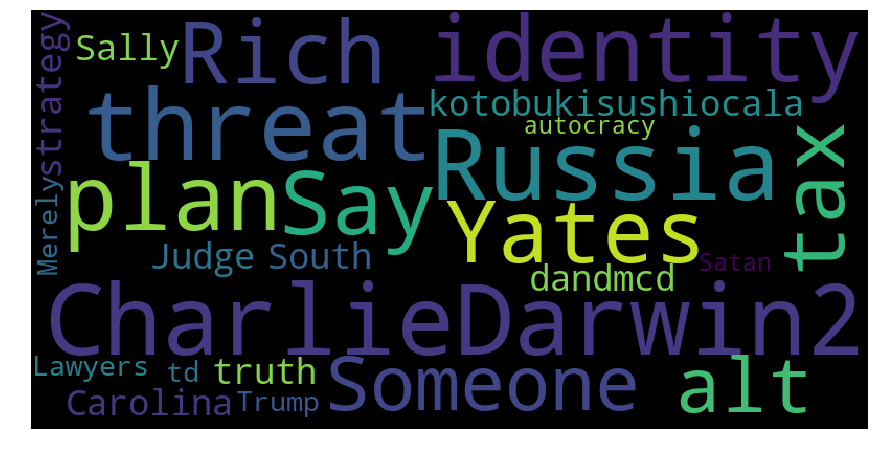

In [78]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 400,background_color='black').generate(' '.join(entities['entity']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

In [54]:
from pandas import read_sql

sentiment=read_sql("""select max (mag) as magnitude, entity 
from sentiment_table 
group by entity
order by magnitude DESC
limit 20;""",conn)
sentiment.head(20)

,magnitude,entity
0,0.7,Kaine
1,0.5,rebuke
2,0.5,congress
3,0.4,request
4,0.4,title
5,0.3,climate change lobby
6,0.3,autocracy
7,0.3,Attribution
8,0.3,compliance office
9,0.3,Senate


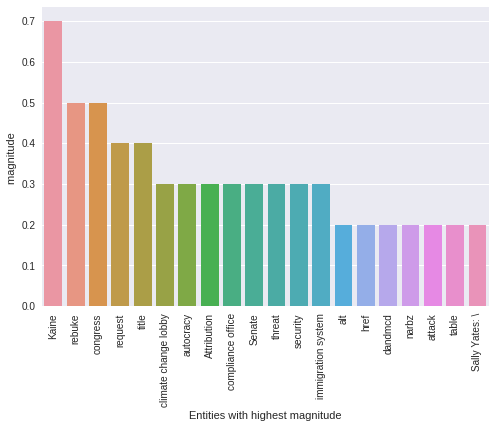

In [70]:
bar_plot=sns.barplot(x="entity",y="magnitude",data=sentiment)
plt.xlabel("Entities with highest magnitude")
plt.ylabel("magnitude ")
plt.xticks(rotation=90)
plt.show()

In [67]:
from pandas import read_sql

score=read_sql("""select max (sentscore) as sentiment_score, entity 
from sentiment_table 
group by entity
order by sentiment_score ASC
limit 20;""",conn)
score.head(20)

,sentiment_score,entity
0,-0.7,Kaine
1,-0.5,rebuke
2,-0.5,congress
3,-0.4,request
4,-0.3,Senate
5,-0.3,threat
6,-0.3,compliance office
7,-0.3,climate change lobby
8,-0.3,autocracy
9,-0.2,administration


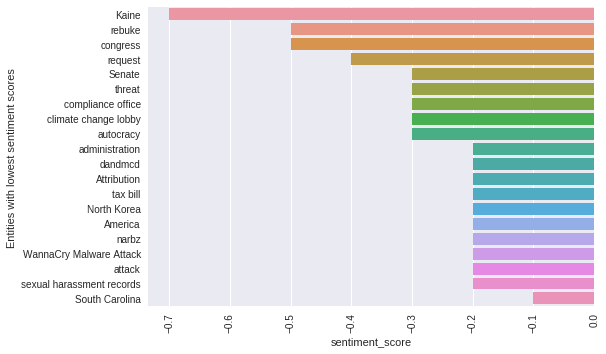

In [79]:
bar_plot=sns.barplot(x="sentiment_score",y="entity",data=score)
plt.xlabel("sentiment_score")
plt.ylabel("Entities with lowest sentiment scores ")
plt.xticks(rotation=90)
plt.show()

## Preparing your submission

### Deliverables: 
   1. This or a replacement Notebook
   1. An aggregateion of data in tabular format that conveyes something interesting about the Reddit RSS feed during your scraping.
     * The table can be embedded or uploaded into this folder (CSV or Excel)
   1. One or more data visualizations

Imbed your image into this page by saving your data visualization as: `FINAL_PROJECT_IMAGE.png`  
Upload it to the `module8/exercises/` folder.

If you need to, change the file type to `.jpg` or `.jpeg` or ... whatever, then update the link in this cell (double click to edit).  
Then re-run this markdown cell to see it.

![FINAL_PROJECT_IMAGE.png MISSING](./exercises/FINAL_PROJECT_IMAGE.png)


# Save your Notebook!